## Predicting House Sale Prices
In this project, I'm using Linear Regression to build a machine learning for predicting a house price. 
Before the model traning, we need to transform and apply various feature engineering is necessary. The RMSE is used as the error metric.

The data set is "AmesHousing.tsv", you can retreive from here:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

## Explore the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

pd.set_option('display.max_columns', 500)
data = pd.read_csv("AmesHousing.tsv", delimiter='\t')

In [2]:
print(data.shape)
print(len(str(data.shape))*'-')
print(data.dtypes.value_counts())
data.head()

(2930, 82)
----------
object     43
int64      28
float64    11
dtype: int64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Data cleaning and Feature Engineering
This dataset has a total of 82 columns and 2930 rows. Since we'll be using the linear regression model, we can only use numerical values in our model.We can do the following things to clean up the data:

- The 'Order' and 'PID' columns are not useful for machine learning as they are simply identification numbers.
- It doesn't make much sense to use 'Year built' and 'Year Remod/Add'(remodel) in our model. We should generate a new column to determine how old the house is since the last remodelling.
-  drop columns with too many missing values(More then 5%).
- To avoid leak sales information to our model. Sales information will not be available to us when we actually use the model to estimate the price of a house.

In [3]:
#Create a new feature, 'years_to_sell'.
data['years_to_sell'] = data['Yr Sold'] - data['Year Remod/Add'] 
data = data[data['years_to_sell'] >= 0]

#Remove features that are not useful for machine learning.
data = data.drop(['Order', 'PID'], axis=1)

#Remove features that leak sales data.
data = data.drop(['Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'], axis=1)

#Drop columns with more than 5% missing values
is_null_counts = data.isnull().sum()
features_col = is_null_counts[is_null_counts < 2930*0.05].index


data = data[features_col]
data.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_to_sell
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,215000,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,105000,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,172000,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,244000,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,189900,12


Since there are a lot columns, it is a good idea to split the data up into two dataframes. We'll first work with the 'float' and 'int' columns. Then we'll set 'object' columns to a new dataframe. Once both dataframes contain only numerical values, we can combine them again and use the features for our linear regression model.

There are qutie a bit of NA values in the numerical columns, so we'll fill them up with the "mode". Some of the columns are categorical, so it wouldn't make sense to use median or mean for this.

### Numerical data:

In [4]:
#split numerical_data coloumns
numerical_cols = data.dtypes[data.dtypes != 'object'].index
numerical_data = data[numerical_cols]

#Assign the mode of the column to NA values
numerical_data = numerical_data.fillna(data.mode().iloc[0])
numerical_data.isnull().sum().sort_values(ascending = False)

years_to_sell      0
BsmtFin SF 2       0
Gr Liv Area        0
Low Qual Fin SF    0
2nd Flr SF         0
1st Flr SF         0
Total Bsmt SF      0
Bsmt Unf SF        0
BsmtFin SF 1       0
SalePrice          0
Mas Vnr Area       0
Year Remod/Add     0
Year Built         0
Overall Cond       0
Overall Qual       0
Lot Area           0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
MS SubClass        0
dtype: int64

let's check the correlations of all the numerical columns with respect to 'SalePrice' and select only those more than 0.4 

In [21]:
num_corr = numerical_data.corr()['SalePrice'].abs().sort_values(ascending = False)
num_corr

SalePrice          1.000000
Overall Qual       0.801206
Gr Liv Area        0.717596
Garage Cars        0.648361
Total Bsmt SF      0.644012
Garage Area        0.641425
1st Flr SF         0.635185
Year Built         0.558490
Full Bath          0.546118
years_to_sell      0.534985
Year Remod/Add     0.533007
Mas Vnr Area       0.506983
TotRms AbvGrd      0.498574
Fireplaces         0.474831
BsmtFin SF 1       0.439284
Wood Deck SF       0.328183
Open Porch SF      0.316262
Half Bath          0.284871
Bsmt Full Bath     0.276258
2nd Flr SF         0.269601
Lot Area           0.267520
Bsmt Unf SF        0.182751
Bedroom AbvGr      0.143916
Enclosed Porch     0.128685
Kitchen AbvGr      0.119760
Screen Porch       0.112280
Overall Cond       0.101540
Pool Area          0.068438
Low Qual Fin SF    0.037629
Bsmt Half Bath     0.035875
3Ssn Porch         0.032268
Misc Val           0.019273
BsmtFin SF 2       0.006127
Name: SalePrice, dtype: float64

drop values with less than 0.4 correlation

In [22]:
num_corr = num_corr[num_corr > 0.4]
high_corr_cols = num_corr.index

hi_corr_numerical_data = numerical_data[high_corr_cols]

### Categorical Data
For the 'object' or text columns, we'll drop any column with more than 1 missing value.

In [23]:
text_cols = data.dtypes[data.dtypes == 'object'].index
text_data = data[text_cols]

text_null_counts = text_data.isnull().sum()
text_not_null_cols = text_null_counts[text_null_counts < 1].index

text_data = text_data[text_not_null_cols]
text_data.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,TA,TA,CBlock,GasA,Fa,Y,TA,Typ,P
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,GasA,TA,Y,TA,Typ,Y
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,GasA,TA,Y,Gd,Typ,Y
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,Gd,TA,CBlock,GasA,Ex,Y,Ex,Typ,Y
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Gd,Y,TA,Typ,Y


From the documatation we want to convert any columns that are nominal into categories. 'MS subclass' is a numerical column but it should be categorical.

For the text columns, we'll take the list of nominal columns from the documentation and use a for loop to search for matches

In [24]:
nominal_cols = ['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Roof Mat1', 'Exterior 1st',  'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air'] 
nominal_num_col = ['MS SubClass']

In [25]:
#Finds nominal columns in text_data
nominal_text_col = []
for col in nominal_cols:
    if col in text_data.columns:
        nominal_text_col.append(col)
nominal_text_col

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

Simply use boolean filtering to keep the relevant columns in text dataframe

In [26]:
text_data = text_data[nominal_text_col]

for col in nominal_text_col:
    print(col)
    print(text_data[col].value_counts())
    print("-"*10)

MS Zoning
RL         2270
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64
----------
Street
Pave    2915
Grvl      12
Name: Street, dtype: int64
----------
Land Contour
Lvl    2632
HLS     120
Bnk     115
Low      60
Name: Land Contour, dtype: int64
----------
Lot Config
Inside     2138
Corner      510
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64
----------
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    165
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64
----------
Condition 1
Norm      2520
Feedr      164
Artery   

Columns with too many categories can cause overfitting. We'll remove any columns with more than 10 categories. 

In [27]:
nominal_text_col_unique = []
for col in nominal_text_col:
    if len(text_data[col].value_counts()) <= 10:
        nominal_text_col_unique.append(col)
               
text_data = text_data[nominal_text_col_unique]

 Use the pd.get_dummies function to create dummy columns for all the categorical columns 

In [12]:
#Create dummy columns for nominal text columns, then create a dataframe.
for col in text_data.columns:
    text_data[col] = text_data[col].astype('category')   
    
categorical_text_data = pd.get_dummies(text_data)    
categorical_text_data.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y
0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [61]:
#Create dummy columns for nominal numerical columns, then create a dataframe.
for col in numerical_data.columns:
    if col in nominal_num_col:
        numerical_data[col] = numerical_data[col].astype('category')  
              
categorical_numerical_data = pd.get_dummies(numerical_data.select_dtypes(include=['category'])) 
categorical_numerical_data.head()

,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [28]:
#Combine the two categorical columns together.
categorical_data = pd.concat([categorical_text_data, categorical_numerical_data], axis=1)

We end up with one numerical dataframe, and one categorical dataframe. We can then combine them into one dataframe for machine learning.

In [22]:
#numerical dataframe
hi_corr_numerical_data.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Year Built,Full Bath,years_to_sell,Year Remod/Add,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1
0,215000,6,1656,2.0,1080.0,528.0,1656,1960,1,50,1960,112.0,7,2,639.0
1,105000,5,896,1.0,882.0,730.0,896,1961,1,49,1961,0.0,5,0,468.0
2,172000,6,1329,1.0,1329.0,312.0,1329,1958,1,52,1958,108.0,6,0,923.0
3,244000,7,2110,2.0,2110.0,522.0,2110,1968,2,42,1968,0.0,8,2,1065.0
4,189900,5,1629,2.0,928.0,482.0,928,1997,2,12,1998,0.0,6,1,791.0


Show categorical datafreame

In [18]:
categorical_data.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [29]:
#Combine aboved two together
final_data = pd.concat([hi_corr_numerical_data, categorical_data], axis=1)

## Applying Machine Learning
We'll use the linear regression model from scikit-learn. Linear regression should work well here since our target column 'SalePrice' is a continuous value. We'll evaluate this model with RMSE as an error metric.

In [92]:
    train = final_data[0:1460]
    test = final_data[1460:]
    features = final_data.columns.drop(['SalePrice'])
    
    #train
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    
    #predict
    predictions = lr.predict(test[features])
    rmse = mean_squared_error(test['SalePrice'], predictions)**0.5
    print("RMSE is",rmse)

    compare_result = pd.DataFrame({"Real price":test['SalePrice'],"Predicted_price":predictions})
    compare_result.head(10)
    
   

('RMSE is', 34917.882101729403)


,Predicted_price,Real price
1460,308646.740279,274000
1461,316286.002118,300000
1462,267757.255118,255900
1463,229580.527166,224900
1464,254615.525187,240000
1465,200257.468968,183000
1466,224544.303161,207000
1467,228987.929051,210000
1468,146296.220383,136500
1469,147318.170484,145000


We can use KFold cross validation to split the data in K number of folds. 

In [93]:
from sklearn.model_selection import KFold

def train_and_test2(data, k=2):  
    rf = LinearRegression()
    if k == 0:
        train = data[0:1460]
        test = data[1460:]
        features = data.columns.drop(['SalePrice'])
    
        #train
        rf.fit(train[features], train['SalePrice'])
        
        #predict    
        predictions = rf.predict(test[features])
        rmse = mean_squared_error(test['SalePrice'], predictions)**0.5
        return rmse
    
    elif k == 1:
        train = data[:1460]
        test = data[1460:]
        features = data.columns.drop(['SalePrice'])
        
        rf.fit(train[features], train["SalePrice"])
        predictions_one = rf.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        rf.fit(test[features], test["SalePrice"])
        predictions_two = rf.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        return np.mean([rmse_one, rmse_two])   
    
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state = 2)
        rmse_list = []
        for train_index, test_index in kf.split(data):
            train = data.iloc[train_index]
            test = data.iloc[test_index]
            features = data.columns.drop(['SalePrice'])
    
            #train
            rf.fit(train[features], train['SalePrice'])
        
            #predict    
            predictions = rf.predict(test[features])
        
            rmse = mean_squared_error(test['SalePrice'], predictions)**0.5
            rmse_list.append(rmse)
        return np.mean(rmse_list)

29224.3340372


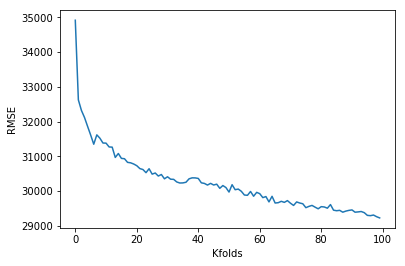

In [94]:
results = []
for i in range(100):
    result = train_and_test2(final_data, k=i)
    results.append(result)
    
x = [i for i in range(100)]
y = results 
plt.plot(x, y)
plt.xlabel('Kfolds')
plt.ylabel('RMSE')

print(results[99])

When k = 0, the error is actually the lowest. This is acutally not very useful because it means the model is only useful for the indices we've picked out. Without validation we can't make sure that the model works well for any set of data.